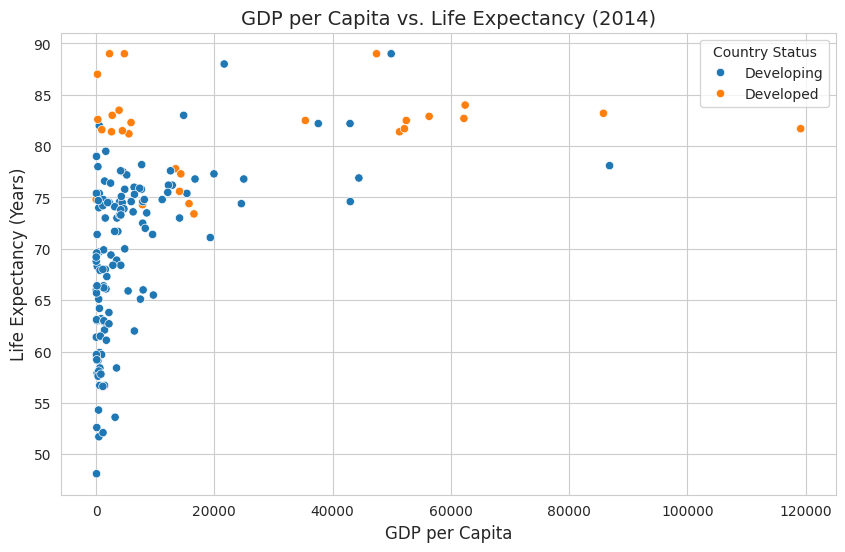

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Life Expectancy Data.csv")

# Filter data for the year 2014
data_2014 = df[df["Year"] == 2014].copy()

# Drop missing values in GDP and Life expectancy
data_2014 = data_2014.dropna(subset=["GDP", "Life expectancy "])

# Create the scatter plot with the cleaned latest year data
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.scatterplot(data=data_2014, x="GDP", y="Life expectancy ", hue="Status")

# Titles and labels
plt.title(f"GDP per Capita vs. Life Expectancy ({2014})", fontsize=14)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.legend(title="Country Status")

# Show plot
plt.show()

In [ ]:
# Conclusion
# There is a weak linear positive relationship between GDP per Capita and Life Expectancy.
# But more importantly, we can see that developed country's Life Expectancy is longer than developing countries' through our eyes.

<ipython-input-4-2494de4b6604>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_2014, x="Status", y="Life expectancy ", palette=["blue", "orange"])


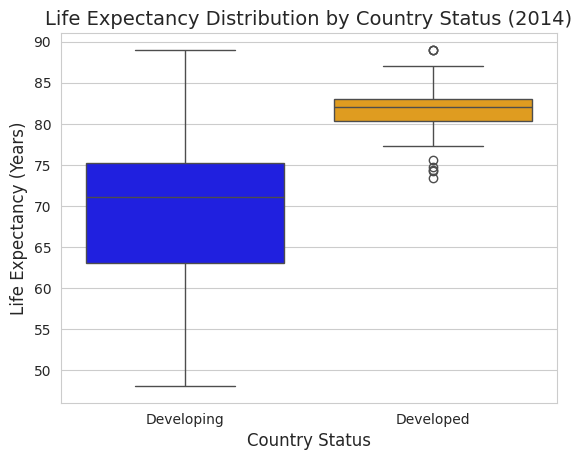

Status
Developed     81.475000
Developing    69.300787
Name: Life expectancy , dtype: float64


In [4]:
# Assure my assumption
sns.boxplot(data=data_2014, x="Status", y="Life expectancy ", palette=["blue", "orange"])

# Titles and labels
plt.title(f"Life Expectancy Distribution by Country Status ({2014})", fontsize=14)
plt.xlabel("Country Status", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)

plt.show()

# Calculate average Life Expectancy for Developed and Developing countries in 2014
avg_life_expectancy = data_2014.groupby("Status")["Life expectancy "].mean()

# Display the results
print(avg_life_expectancy)

In [ ]:
# Conclusion
# Developed countries' life expectancy generally is longer than developing countries' in both median and average
# Therefore, we need to figure out why developed countries' Life expectancy is longer and are there any potential indicators?

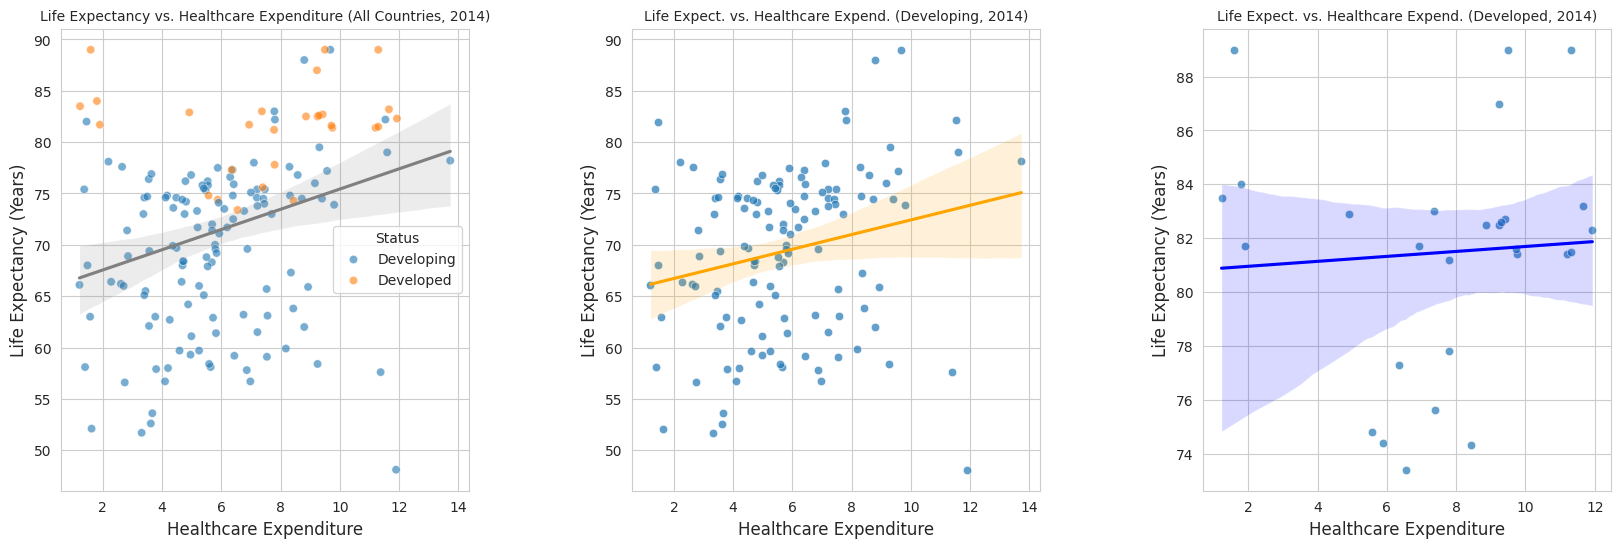

In [5]:
# First, I want to see whether healthcare expense is a suitable indicator because the more healthcare expense, the healthier society is

data_2014_health = data_2014.dropna(subset=["Total expenditure", "Life expectancy "])

# Separate by status
developed_2014_health = data_2014_health[data_2014_health["Status"] == "Developed"]
developing_2014_health = data_2014_health[data_2014_health["Status"] == "Developing"]

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")
plt.subplots_adjust(wspace=0.4)

# 1st plot: Scatterplot with all countries and line of best fit
sns.scatterplot(
    data=data_2014_health,
    x="Total expenditure",
    y="Life expectancy ",
    hue="Status",
    alpha=0.6,
    ax=axes[0]
)
sns.regplot(
    data=data_2014_health,
    x="Total expenditure",
    y="Life expectancy ",
    scatter=False,
    ax=axes[0],
    color='gray'
)
axes[0].set_title("Life Expectancy vs. Healthcare Expenditure (All Countries, 2014)", fontsize=10)
axes[0].set_xlabel("Healthcare Expenditure", fontsize=12)
axes[0].set_ylabel("Life Expectancy (Years)", fontsize=12)
axes[0].legend(title="Status")

# 2nd plot: Scatterplot for Developing countries
sns.scatterplot(
    data=developing_2014_health,
    x="Total expenditure",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[1]
)
sns.regplot(
    data=developing_2014_health,
    x="Total expenditure",
    y="Life expectancy ",
    scatter=False,
    ax=axes[1],
    color='orange'
)
axes[1].set_title("Life Expect. vs. Healthcare Expend. (Developing, 2014)", fontsize=10)
axes[1].set_xlabel("Healthcare Expenditure", fontsize=12)
axes[1].set_ylabel("Life Expectancy (Years)", fontsize=12)

# 3rd plot: Scatterplot for Developed countries ---
sns.scatterplot(
    data=developed_2014_health,
    x="Total expenditure",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[2]
)
sns.regplot(
    data=developed_2014_health,
    x="Total expenditure",
    y="Life expectancy ",
    scatter=False,
    ax=axes[2],
    color='blue'
)
axes[2].set_title("Life Expect. vs. Healthcare Expend. (Developed, 2014)", fontsize=10)
axes[2].set_xlabel("Healthcare Expenditure", fontsize=12)
axes[2].set_ylabel("Life Expectancy (Years)", fontsize=12)

# Show all plots
plt.show()

In [ ]:
# Conclusion
# Based on first graph, we can see that even countries with lower healthcare expense may have higher life expectancy
# Plus, there is not a clear trend between healthcare expenditure and life expectancy on both developed countries and developing countries
# So Healthcare is not a optimal indicator for predicting life expectancy

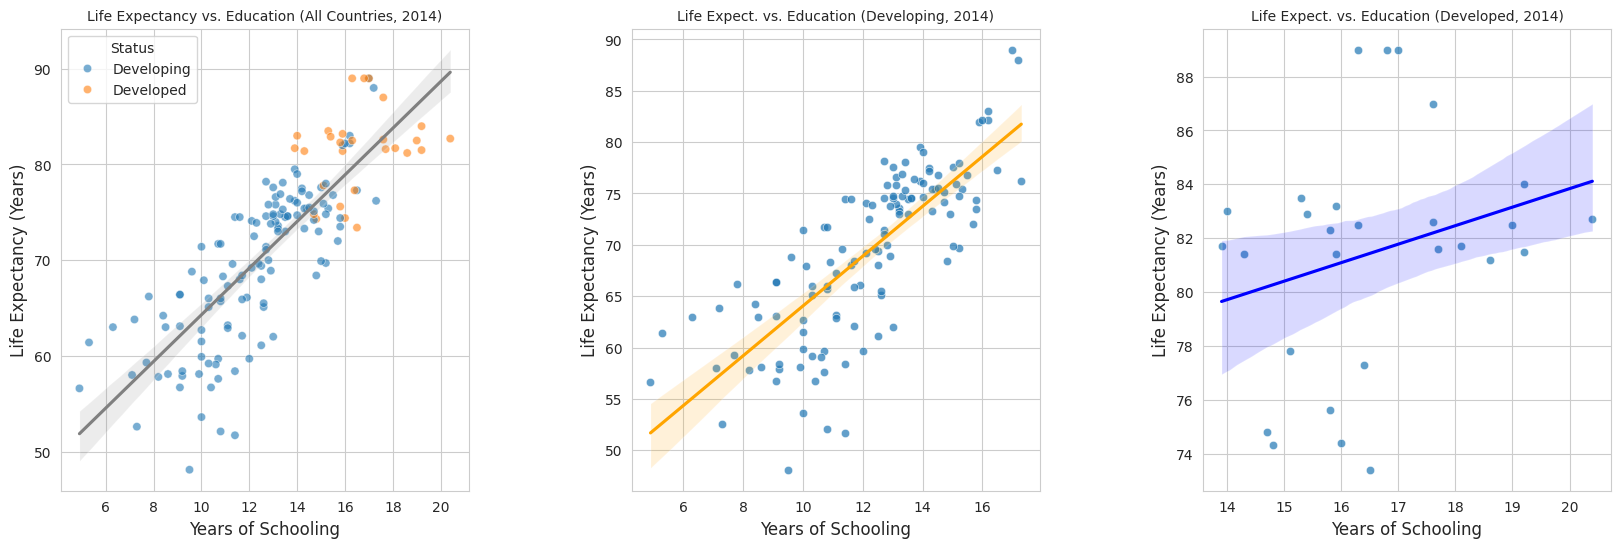

In [6]:
# Now I want to search on education because education is a way to improve health literacy

# Drop missing values in Schooling and Life Expectancy
data_2014_school = data_2014.dropna(subset=["Schooling", "Life expectancy "])

# Separate developed and developing countries
developed_2014_school = data_2014_school[data_2014_school["Status"] == "Developed"]
developing_2014_school = data_2014_school[data_2014_school["Status"] == "Developing"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")
plt.subplots_adjust(wspace=0.4)

# 1st plot: All countries with hue and line of best fit
sns.scatterplot(
    data=data_2014_school,
    x="Schooling",
    y="Life expectancy ",
    hue="Status",
    alpha=0.6,
    ax=axes[0]
)
sns.regplot(
    data=data_2014_school,
    x="Schooling",
    y="Life expectancy ",
    scatter=False,
    ax=axes[0],
    color='gray'
)
axes[0].set_title("Life Expectancy vs. Education (All Countries, 2014)", fontsize=10)
axes[0].set_xlabel("Years of Schooling", fontsize=12)
axes[0].set_ylabel("Life Expectancy (Years)", fontsize=12)
axes[0].legend(title="Status")

# 2nd plot: Developing countries
sns.scatterplot(
    data=developing_2014_school,
    x="Schooling",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[1]
)
sns.regplot(
    data=developing_2014_school,
    x="Schooling",
    y="Life expectancy ",
    scatter=False,
    ax=axes[1],
    color='orange'
)
axes[1].set_title("Life Expect. vs. Education (Developing, 2014)", fontsize=10)
axes[1].set_xlabel("Years of Schooling", fontsize=12)
axes[1].set_ylabel("Life Expectancy (Years)", fontsize=12)

# 3rd plot: Developed countries
sns.scatterplot(
    data=developed_2014_school,
    x="Schooling",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[2]
)
sns.regplot(
    data=developed_2014_school,
    x="Schooling",
    y="Life expectancy ",
    scatter=False,
    ax=axes[2],
    color='blue'
)
axes[2].set_title("Life Expect. vs. Education (Developed, 2014)", fontsize=10)
axes[2].set_xlabel("Years of Schooling", fontsize=12)
axes[2].set_ylabel("Life Expectancy (Years)", fontsize=12)

plt.show()

In [ ]:
# Conclusion
# Based on the first graph, we can see a strong linear postive relationship between education level and life expectancy
# And developed countries' education level is generally higher than developing countries'
# Based on the second graph, we can also see a stong linear positive relationship between education level and life expectancy among developing countries
# However, this seems does not apply on developed countries

# Findings
# 1 Education can be a potential reason to explain why developed countries life expectancy is higher
# 2 Education can be a potential indicator to predict life expectancy among developing countries

In [ ]:
# To dive deeper into dataset, I assume that higher education can provide better access to income and opportunities (income composition).
# So I want to validate my assumption and if it is true, we should expect a positive relationship between income composition and life expectancy

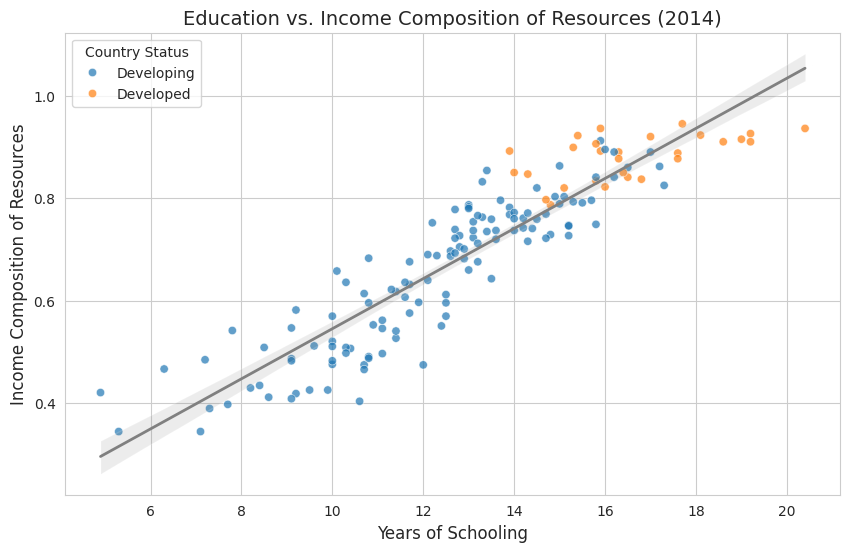

In [7]:
# Drop missing values in Schooling and Income composition
edu_income_data = data_2014.dropna(subset=["Schooling", "Income composition of resources"])

# Set style
sns.set_style("whitegrid")

# Create scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=edu_income_data,
    x="Schooling",
    y="Income composition of resources",
    hue="Status",
    alpha=0.7
)
sns.regplot(
    data=edu_income_data,
    x="Schooling",
    y="Income composition of resources",
    scatter=False,
    color='gray',
    line_kws={'linewidth': 2}
)

# Titles and labels
plt.title("Education vs. Income Composition of Resources (2014)", fontsize=14)
plt.xlabel("Years of Schooling", fontsize=12)
plt.ylabel("Income Composition of Resources", fontsize=12)
plt.legend(title="Country Status")

# Show plot
plt.show()

In [ ]:
# This validates my assumption
# So we should expect a positive relationship between income composition and life expectancy

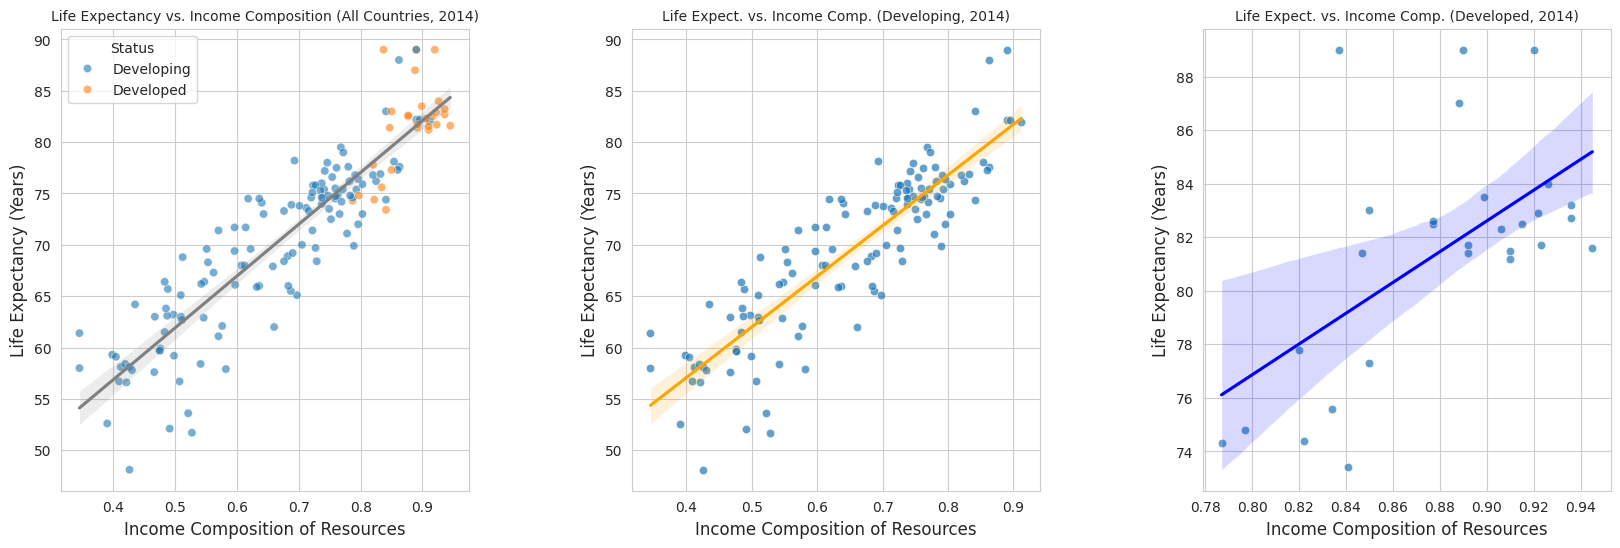

In [8]:
# Now I want to validate whether income composition predicts life expectancy

# Drop missing values in Income Composition and Life Expectancy
data_2014_income = data_2014.dropna(subset=["Income composition of resources", "Life expectancy "])

# Separate developed and developing countries
developed_2014_income = data_2014_income[data_2014_income["Status"] == "Developed"]
developing_2014_income = data_2014_income[data_2014_income["Status"] == "Developing"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")
plt.subplots_adjust(wspace=0.4)

# 1st plot: All countries with hue and line of best fit
sns.scatterplot(
    data=data_2014_income,
    x="Income composition of resources",
    y="Life expectancy ",
    hue="Status",
    alpha=0.6,
    ax=axes[0]
)
sns.regplot(
    data=data_2014_income,
    x="Income composition of resources",
    y="Life expectancy ",
    scatter=False,
    ax=axes[0],
    color='gray'
)
axes[0].set_title("Life Expectancy vs. Income Composition (All Countries, 2014)", fontsize=10)
axes[0].set_xlabel("Income Composition of Resources", fontsize=12)
axes[0].set_ylabel("Life Expectancy (Years)", fontsize=12)
axes[0].legend(title="Status")

# 2nd plot: Developing countries
sns.scatterplot(
    data=developing_2014_income,
    x="Income composition of resources",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[1]
)
sns.regplot(
    data=developing_2014_income,
    x="Income composition of resources",
    y="Life expectancy ",
    scatter=False,
    ax=axes[1],
    color='orange'
)
axes[1].set_title("Life Expect. vs. Income Comp. (Developing, 2014)", fontsize=10)
axes[1].set_xlabel("Income Composition of Resources", fontsize=12)
axes[1].set_ylabel("Life Expectancy (Years)", fontsize=12)

# 3rd plot: Developed countries
sns.scatterplot(
    data=developed_2014_income,
    x="Income composition of resources",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[2]
)
sns.regplot(
    data=developed_2014_income,
    x="Income composition of resources",
    y="Life expectancy ",
    scatter=False,
    ax=axes[2],
    color='blue'
)
axes[2].set_title("Life Expect. vs. Income Comp. (Developed, 2014)", fontsize=10)
axes[2].set_xlabel("Income Composition of Resources", fontsize=12)
axes[2].set_ylabel("Life Expectancy (Years)", fontsize=12)

plt.show()


In [ ]:
# Conclusion
# Based on the first graph, we can see a strong linear postive relationship between income composition and life expectancy
# And developed countries' income composition is generally higher than developing countries'
# Based on the second graph, we can also see a stong linear positive relationship between education level and life expectancy among developing countries
# However, relationship is relatively weak in developed countries

# Findings
# 1 Income Composition can be a potential reason to explain why developed countries life expectancy is higher
# 2 Income Composition can be a potential indicator to predict life expectancy among developing countries

In [ ]:
# So far I know that higher education level and income composition can lead to higher life expectancy
# But are there still any other indicators?
# I think countries with higher education level and income composition will have less thinness rate than developing countries'
# Becuase both education level and income composition indicates living standard
# Now I need to validate

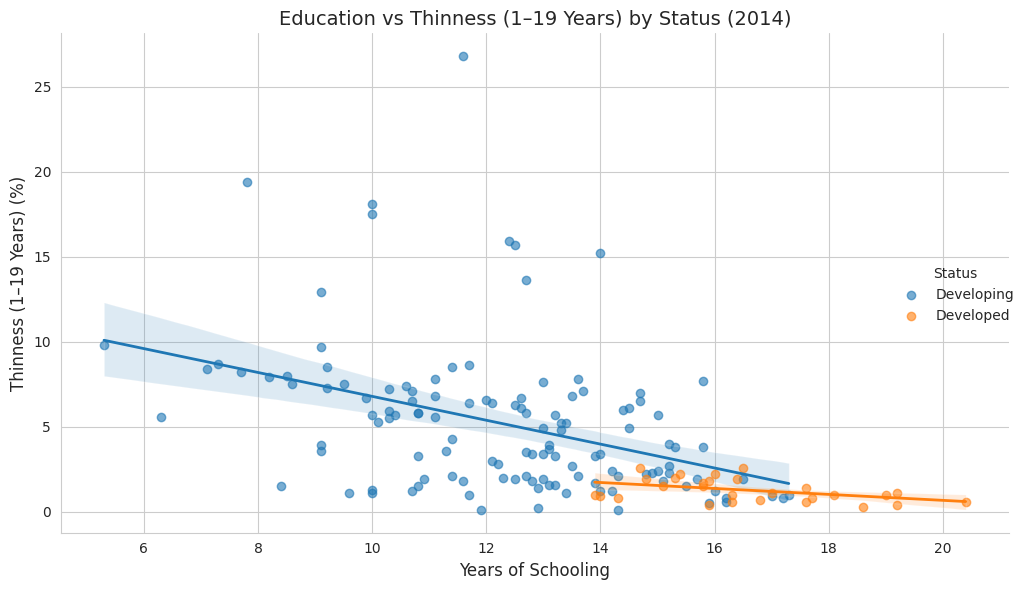

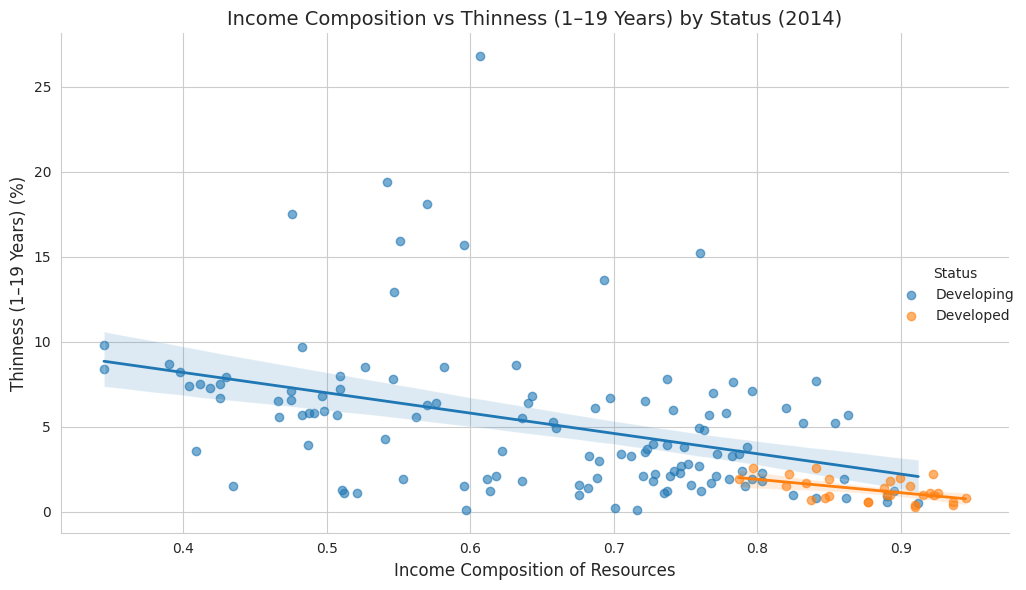

In [ ]:
# Fix column name spacing
data_2014.rename(columns={" thinness  1-19 years": "Thinness (1-19)"}, inplace=True)

# Drop missing values for relevant columns
thin_data = data_2014.dropna(subset=["Thinness (1-19)", "Schooling", "Income composition of resources", "Status"])

# Set plot style
sns.set_style("whitegrid")

# --- Plot 1: Schooling vs Thinness (1–19 Years) ---
sns.lmplot(
    data=thin_data,
    x="Schooling",
    y="Thinness (1-19)",
    hue="Status",
    scatter_kws={'alpha': 0.6},
    height=6,
    aspect=1.5,
    line_kws={"linewidth": 2}
)
plt.title("Education vs Thinness (1–19 Years) by Status (2014)", fontsize=14)
plt.xlabel("Years of Schooling", fontsize=12)
plt.ylabel("Thinness (1–19 Years) (%)", fontsize=12)
plt.tight_layout()
plt.show()

# --- Plot 2: Income Composition vs Thinness (1–19 Years) ---
sns.lmplot(
    data=thin_data,
    x="Income composition of resources",
    y="Thinness (1-19)",
    hue="Status",
    scatter_kws={'alpha': 0.6},
    height=6,
    aspect=1.5,
    line_kws={"linewidth": 2}
)
plt.title("Income Composition vs Thinness (1–19 Years) by Status (2014)", fontsize=14)
plt.xlabel("Income Composition of Resources", fontsize=12)
plt.ylabel("Thinness (1–19 Years) (%)", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# This graph validates our assumption
# So we should expect that lower thinness rate could lead to higher life expectancy

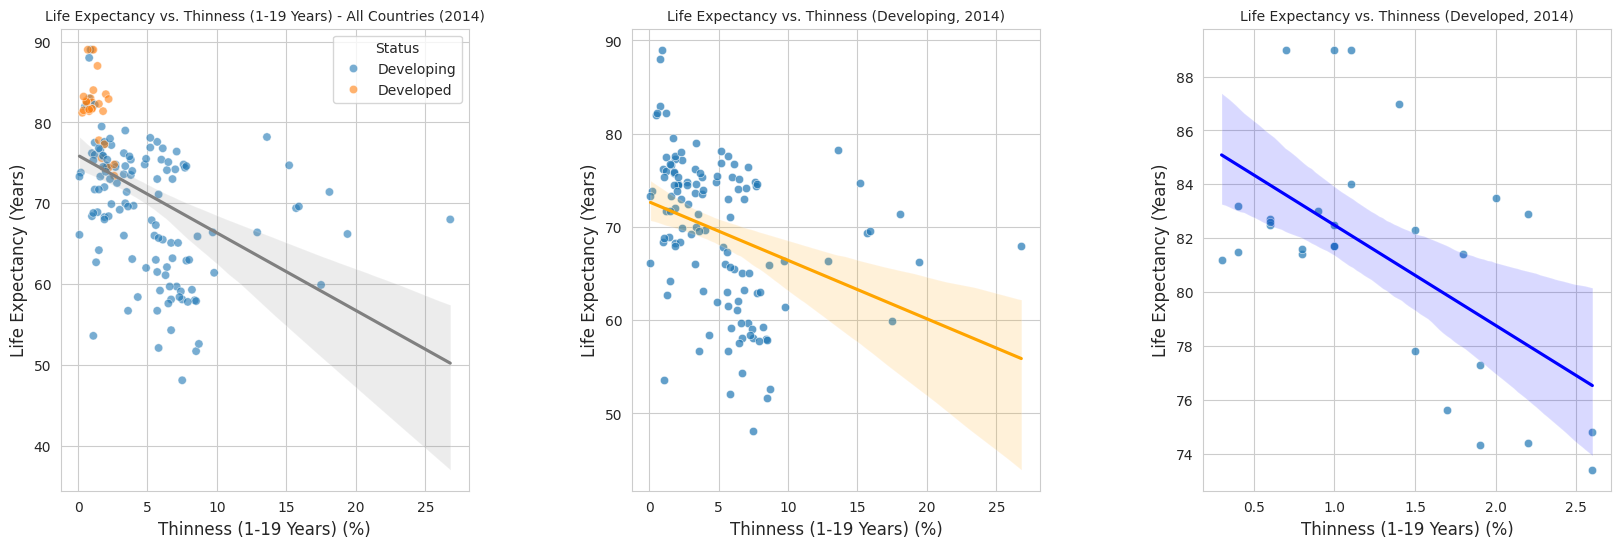

In [ ]:
# Fix column name spacing
data_2014.rename(columns={" thinness  1-19 years": "Thinness (1-19)"}, inplace=True)

# Drop missing values in Thinness and Life Expectancy
data_2014_thin = data_2014.dropna(subset=["Thinness (1-19)", "Life expectancy "])

# Separate developed and developing countries
developed_2014_thin = data_2014_thin[data_2014_thin["Status"] == "Developed"]
developing_2014_thin = data_2014_thin[data_2014_thin["Status"] == "Developing"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")
plt.subplots_adjust(wspace=0.4)

# 1st plot: All countries with hue and regression line
sns.scatterplot(
    data=data_2014_thin,
    x="Thinness (1-19)",
    y="Life expectancy ",
    hue="Status",
    alpha=0.6,
    ax=axes[0]
)
sns.regplot(
    data=data_2014_thin,
    x="Thinness (1-19)",
    y="Life expectancy ",
    scatter=False,
    ax=axes[0],
    color='gray'
)
axes[0].set_title("Life Expectancy vs. Thinness (1-19 Years) - All Countries (2014)", fontsize=10)
axes[0].set_xlabel("Thinness (1-19 Years) (%)", fontsize=12)
axes[0].set_ylabel("Life Expectancy (Years)", fontsize=12)
axes[0].legend(title="Status")

# 2nd plot: Developing countries
sns.scatterplot(
    data=developing_2014_thin,
    x="Thinness (1-19)",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[1]
)
sns.regplot(
    data=developing_2014_thin,
    x="Thinness (1-19)",
    y="Life expectancy ",
    scatter=False,
    ax=axes[1],
    color='orange'
)
axes[1].set_title("Life Expectancy vs. Thinness (Developing, 2014)", fontsize=10)
axes[1].set_xlabel("Thinness (1-19 Years) (%)", fontsize=12)
axes[1].set_ylabel("Life Expectancy (Years)", fontsize=12)

# 3rd plot: Developed countries
sns.scatterplot(
    data=developed_2014_thin,
    x="Thinness (1-19)",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[2]
)
sns.regplot(
    data=developed_2014_thin,
    x="Thinness (1-19)",
    y="Life expectancy ",
    scatter=False,
    ax=axes[2],
    color='blue'
)
axes[2].set_title("Life Expectancy vs. Thinness (Developed, 2014)", fontsize=10)
axes[2].set_xlabel("Thinness (1-19 Years) (%)", fontsize=12)
axes[2].set_ylabel("Life Expectancy (Years)", fontsize=12)

# Show all plots
plt.show()



In [ ]:
# Conclusion

# Based on the first graph, we can see a moderate linear negative relationship between thinness rate and life expectancy
# And developed countries' thinness rate is generally lower than developing countries'
# Based on the third graph, we can see a stong moderate negative relationship between thinnes rate and life expectancy among developed countries
# However, relationship is relatively weak in developing countries

# Findings
# 1 Thinness rate can be a potential reason to explain why developed countries life expectancy is higher
# 2 Thinness rate can be a potential indicator to predict life expectancy among developed countries

In [ ]:
# After identifying Schooling, Income composition, and Thinness as strong individual predictors of life expectancy, I became interested in how these variables might interact. Each captures a different dimension of structural development—education, economic access, and nutrition—and all are meaningfully correlated with life expectancy on their own.
# However, I wanted to go beyond analyzing them separately and instead explore whether combining certain indicators could reveal deeper patterns. This led me to construct composite scores that reflect the balance between protective factors and health risks, with the goal of capturing how multiple forces together shape population health.
# So I create a ratio, which is schooling / HIV/AIDS
# This means that countries with higher levels of education relative to their HIV/AIDS burden tend to achieve better overall health outcomes.
# A high ratio reflects strong public health capacity, where education likely supports awareness, prevention, and treatment. In contrast, a low ratio indicates that HIV/AIDS remains a significant threat relative to educational access, limiting a country’s ability to improve survival rates.

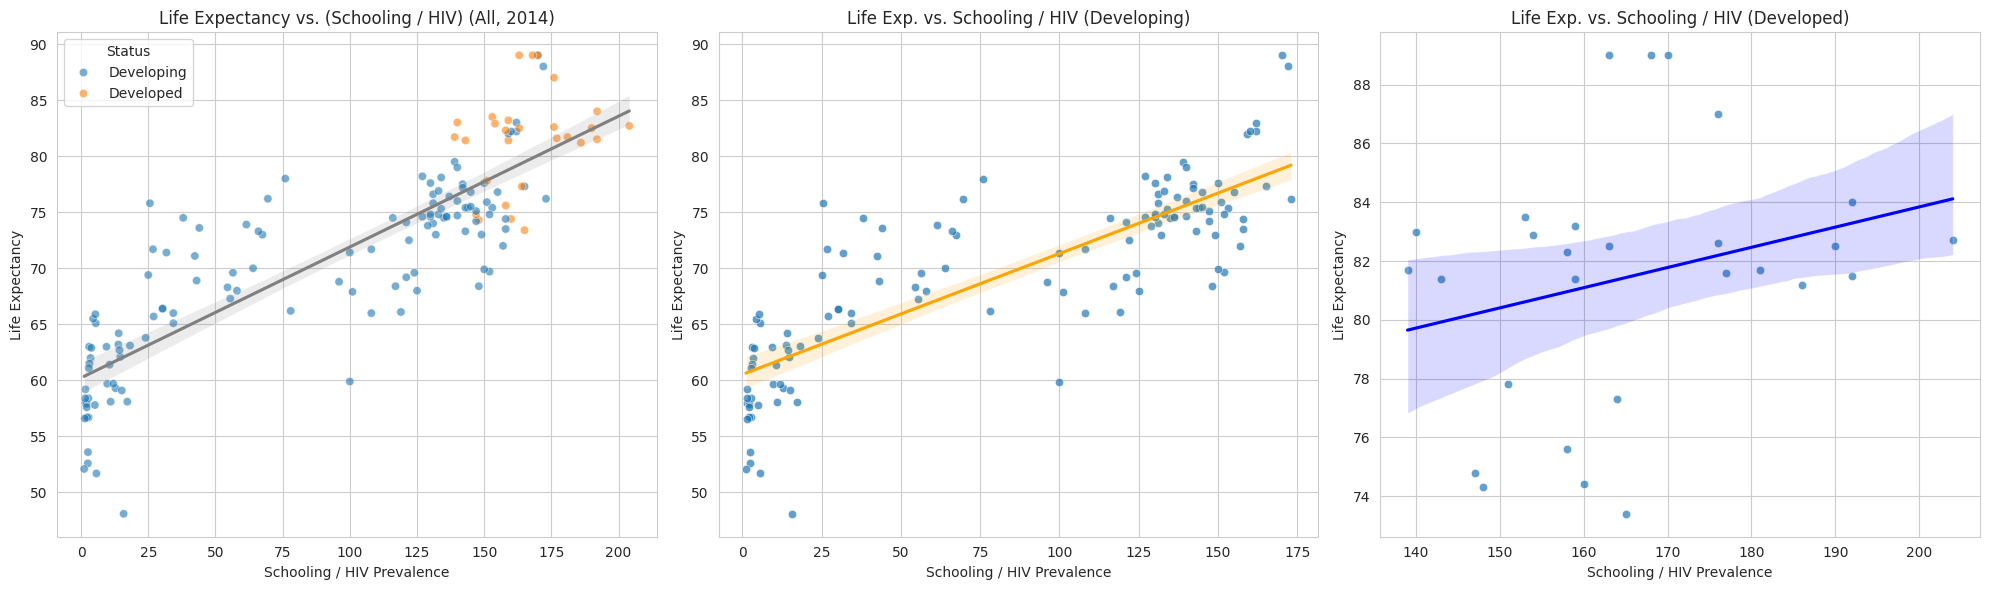

In [ ]:
# Step 1: Create the composite feature
data_2014["Score_Edu_HIV"] = data_2014["Schooling"] / data_2014[" HIV/AIDS"]

# Step 2: Drop missing values
edu_hiv_data = data_2014.dropna(subset=["Score_Edu_HIV", "Life expectancy ", "Status"])

# Step 3: Split by status
developed = edu_hiv_data[edu_hiv_data["Status"] == "Developed"]
developing = edu_hiv_data[edu_hiv_data["Status"] == "Developing"]

# Step 4: Plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")
plt.subplots_adjust(wspace=0.4)

# All countries
sns.scatterplot(
    data=edu_hiv_data,
    x="Score_Edu_HIV",
    y="Life expectancy ",
    hue="Status",
    alpha=0.6,
    ax=axes[0]
)
sns.regplot(
    data=edu_hiv_data,
    x="Score_Edu_HIV",
    y="Life expectancy ",
    scatter=False,
    ax=axes[0],
    color='gray'
)
axes[0].set_title("Life Expectancy vs. (Schooling / HIV) (All, 2014)")
axes[0].set_xlabel("Schooling / HIV Prevalence")
axes[0].set_ylabel("Life Expectancy")
axes[0].legend(title="Status")

# Developing
sns.scatterplot(
    data=developing,
    x="Score_Edu_HIV",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[1]
)
sns.regplot(
    data=developing,
    x="Score_Edu_HIV",
    y="Life expectancy ",
    scatter=False,
    ax=axes[1],
    color='orange'
)
axes[1].set_title("Life Exp. vs. Schooling / HIV (Developing)")
axes[1].set_xlabel("Schooling / HIV Prevalence")
axes[1].set_ylabel("Life Expectancy")

# Developed
sns.scatterplot(
    data=developed,
    x="Score_Edu_HIV",
    y="Life expectancy ",
    alpha=0.7,
    ax=axes[2]
)
sns.regplot(
    data=developed,
    x="Score_Edu_HIV",
    y="Life expectancy ",
    scatter=False,
    ax=axes[2],
    color='blue'
)
axes[2].set_title("Life Exp. vs. Schooling / HIV (Developed)")
axes[2].set_xlabel("Schooling / HIV Prevalence")
axes[2].set_ylabel("Life Expectancy")

plt.tight_layout()
plt.show()


In [ ]:
# Conclusion
# Three graphs show strong positive relationship
# These patterns show how the protective effects of education are especially important when weighed against major health risks like HIV.

In [ ]:
# To wrap up

# We know that there are four factors to account for higher life expectancy
# 1. Higher Education 2. Higher access to income and opportunines 3. lower thinness rate 4. low disease rate
# Potential reasons:
# Education improves health literacy, which can reduce HIV/AIDS transmission and improve treatment outcomes
# Income composition reflects life quality and access to infrastructure and essential services
# Thinness rates indicate levels of malnutrition and food insecurity, especially among the young

# Education and income composition are stronger predictors of life expectancy in developing countries, where differences in access remain large and closely tied to survival. These indicators reflect access to foundational resources like clean water, healthcare, and food—areas where small improvements often lead to major gains in population health.
# In contrast, in developed countries where education and income are already high and stable, thinness becomes a more sensitive indicator, often signaling hidden nutritional stress, social exclusion, or unaddressed health risks.

In [ ]:
# Significance
# These findings show that life expectancy is shaped not by income or healthcare spending alone, but by how multiple structural forces interact.
# Countries that successfully combine protective factors (like education and nutrition) with risk reduction (such as disease control) consistently achieve better health outcomes—even when their income is modest.
# The strategic takeaway is that cross-cutting investments are likely to be most effective:

# In developing countries, this means scaling up access to education while also expanding disease prevention and treatment
# In developed countries, it may mean identifying and addressing hidden health vulnerabilities that traditional indicators overlook
# For policymakers and global health organizations, the implication is clear: long-term gains in life expectancy depend on reinforcing the balance between capacity and exposure—not just raising averages, but reducing gaps.

In [ ]:
# Critical Thinking of this model:
# 1. Limited variable scope: Only three indicators (education, income composition, thinness) are considered. Life expectancy is influenced by many other factors like access to sanitation, environmental conditions, and prevalence of disease.
# 2. Since we mostly use 2014 data, we still need to consider the time factor, like the development within a country
# 3. This dataset only include until 2015. So this may be changed in today's context
